# Project 4

### Phase I

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [59]:
# Load data from provided website
df=pd.read_csv('mushroom.data.csv')
df.head(10)

,edible/poisonous,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [60]:
# Add meaningful names for each column in the DataFrame
newdf=pd.DataFrame(df,
                  columns=['edible/poisonous','odor', 'spore-print-color', 'habitat'])
newdf

,edible/poisonous,odor,spore-print-color,habitat
0,p,p,k,u
1,e,a,n,g
2,e,l,n,m
3,p,p,k,u
4,e,n,n,g
...,...,...,...,...
8119,e,n,b,l
8120,e,n,b,l
8121,e,n,b,l
8122,p,y,w,l


In [61]:
newdf.columns = ['E_P', 'Odor', 'SPcolor', 'Habitat']
newdf

,E_P,Odor,SPcolor,Habitat
0,p,p,k,u
1,e,a,n,g
2,e,l,n,m
3,p,p,k,u
4,e,n,n,g
...,...,...,...,...
8119,e,n,b,l
8120,e,n,b,l
8121,e,n,b,l
8122,p,y,w,l


In [62]:
# Change names of value to be more meaningful with provided information
# E_P Column
newdf.E_P.replace({'e':'edible',
                       'p':'poisonous'}, 
                      inplace = True)
# Odor Column
newdf.Odor.replace({'a':'almond', 
                   'l':'anise',
                   'c':'creosote',
                   'y':'fishy',
                   'f':'foul',
                   'm':'musty',
                   'n':'none',
                   'p':'pungent',
                   's':'spicy'},
                   inplace=True)
# S/P-Color Column
newdf.SPcolor.replace({'k':'black',
                       'n':'brown',
                       'b':'buff',
                       'h':'chocolate',
                       'r':'green',
                       'o':'orange',
                       'u':'purple',
                       'w':'white',
                       'y':'yellow'}, 
                       inplace=True)
# Habitat Column
newdf.Habitat.replace({'g':'grasses',
                       'l':'leaves',
                       'm':'meadows',
                       'p':'paths',
                       'u':'urban',
                       'w':'waste',
                       'd':'woods'
                      },
                      inplace=True)

In [63]:
newdf

,E_P,Odor,SPcolor,Habitat
0,poisonous,pungent,black,urban
1,edible,almond,brown,grasses
2,edible,anise,brown,meadows
3,poisonous,pungent,black,urban
4,edible,none,brown,grasses
...,...,...,...,...
8119,edible,none,buff,leaves
8120,edible,none,buff,leaves
8121,edible,none,buff,leaves
8122,poisonous,fishy,white,leaves


### __Perform exploratory data analysis__: 
show the distribution of data for each of the columns you selected, and show plots for edible/poisonous vs. odor as well as the other columns that you selected. It is up to you to decide which types of plots to use for these tasks. Include text describing your EDA findings.

### Show the distribution of data

In [64]:
# Summarize E_P Data
E_P=newdf.groupby(['E_P']).size().to_frame('Count')
E_P

,Count
E_P,
edible,4208
poisonous,3916


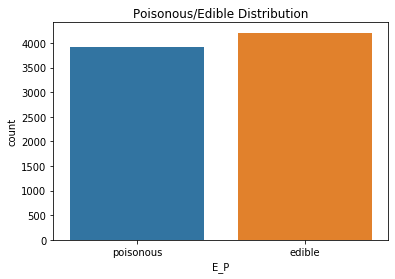

In [65]:
# Show distribution of E_P data 
plt.title('Poisonous/Edible Distribution');
sns.countplot(x='E_P',data=newdf);

In [66]:
# Summarize Odor Data
Odor=newdf.groupby(['Odor']).size().to_frame('Count')
Odor.sort_values(by='Count',ascending=False,inplace=True)
Odor

,Count
Odor,
none,3528
foul,2160
fishy,576
spicy,576
almond,400
anise,400
pungent,256
creosote,192
musty,36


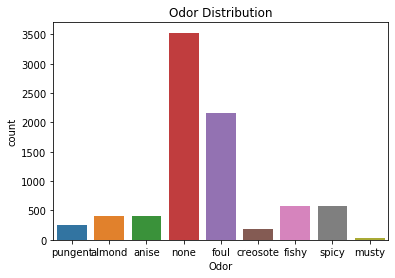

In [67]:
# Show distribution of Odor data 
plt.title('Odor Distribution');
sns.countplot(x='Odor',data=newdf)

In [68]:
# Summarize SPcolor Data
SPcolor=newdf.groupby(['SPcolor']).size().to_frame('Count')
SPcolor.sort_values(by='Count',ascending=False,inplace=True)
SPcolor

,Count
SPcolor,
white,2388
brown,1968
black,1872
chocolate,1632
green,72
buff,48
orange,48
purple,48
yellow,48


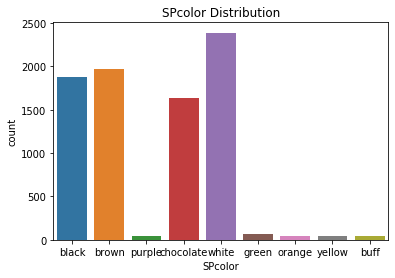

In [69]:
# Show distribution of SPcolor data 
plt.title('SPcolor Distribution')
sns.countplot(x='SPcolor',data=newdf)

In [70]:
# Summarize Habitat Data
Habitat=newdf.groupby(['Habitat']).size().to_frame('Count')
Habitat.sort_values(by='Count',ascending=False,inplace=True)
Habitat

,Count
Habitat,
woods,3148
grasses,2148
paths,1144
leaves,832
urban,368
meadows,292
waste,192


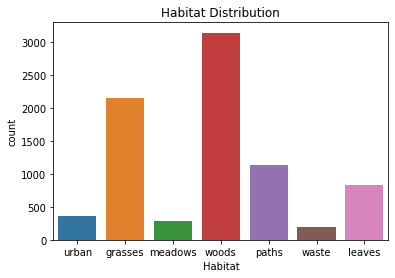

In [71]:
# Show distribution of Habitat data 
plt.title('Habitat Distribution')
sns.countplot(x='Habitat', data=newdf)

### Show plots for edible/poisonous vs other indicators

In [72]:
# create a dataframe to calculate count of mushrooms by E_P and Odor
E_P_Odor=newdf.groupby(['E_P','Odor'],as_index=False)['SPcolor'].count()
E_P_Odor.rename(columns={'SPcolor':'Count'},inplace=True)
E_P_Odor

,E_P,Odor,Count
0,edible,almond,400
1,edible,anise,400
2,edible,none,3408
3,poisonous,creosote,192
4,poisonous,fishy,576
5,poisonous,foul,2160
6,poisonous,musty,36
7,poisonous,none,120
8,poisonous,pungent,256
9,poisonous,spicy,576


In [73]:
# creates dataframe to merge total count of mushrooms by E_P or not and Odor by edible or not
EP_Odor = pd.merge(E_P_Odor,Odor,on=['Odor'],how='outer',suffixes=('_EP_Odor','_Total'))
EP_Odor

,E_P,Odor,Count_EP_Odor,Count_Total
0,edible,almond,400,400
1,edible,anise,400,400
2,edible,none,3408,3528
3,poisonous,none,120,3528
4,poisonous,creosote,192,192
5,poisonous,fishy,576,576
6,poisonous,foul,2160,2160
7,poisonous,musty,36,36
8,poisonous,pungent,256,256
9,poisonous,spicy,576,576


In [74]:
#creates column Percent to calculate percentage of mushrooms by E_P and by Odor
EP_Odor['Percent'] = (EP_Odor['Count_EP_Odor']/EP_Odor['Count_Total']) * 100
EP_Odor

,E_P,Odor,Count_EP_Odor,Count_Total,Percent
0,edible,almond,400,400,100.000000
1,edible,anise,400,400,100.000000
2,edible,none,3408,3528,96.598639
3,poisonous,none,120,3528,3.401361
4,poisonous,creosote,192,192,100.000000
5,poisonous,fishy,576,576,100.000000
6,poisonous,foul,2160,2160,100.000000
7,poisonous,musty,36,36,100.000000
8,poisonous,pungent,256,256,100.000000
9,poisonous,spicy,576,576,100.000000


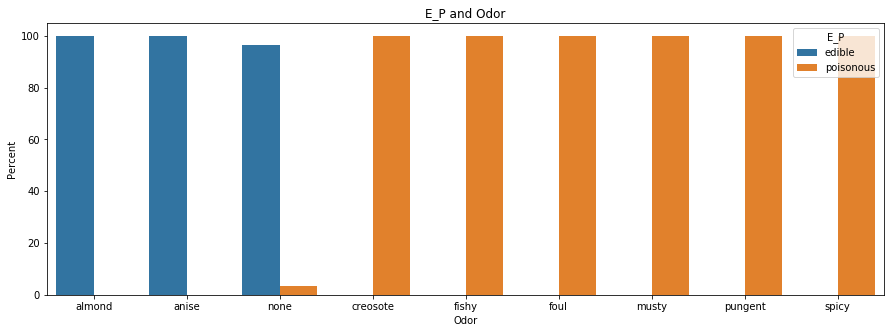

In [75]:
plt.figure(figsize=(15,5))
#plots newdf dataset by Odor and whether it is edible or not using the percentages
sns.barplot(x='Odor',y='Percent',hue='E_P',data=EP_Odor);
# give the plot a title
plt.title('E_P and Odor');

In [76]:
#create a dataframe to calculate count of mushrooms by E_P and SPcolor
EP_SPcolor = newdf.groupby(['E_P','SPcolor'],as_index=False)['Odor'].count()
EP_SPcolor.rename(columns={'Odor':'Count'},inplace=True)
EP_SPcolor

,E_P,SPcolor,Count
0,edible,black,1648
1,edible,brown,1744
2,edible,buff,48
3,edible,chocolate,48
4,edible,orange,48
5,edible,purple,48
6,edible,white,576
7,edible,yellow,48
8,poisonous,black,224
9,poisonous,brown,224


In [77]:
# creates dataframe to merge total count of mushrooms by E_P or not and SPcolor by edible or not
EP_SPcolor = pd.merge(EP_SPcolor,SPcolor,on=['SPcolor'],how='outer',suffixes=('_EP_SPcolor','_Total'))
EP_SPcolor

,E_P,SPcolor,Count_EP_SPcolor,Count_Total
0,edible,black,1648,1872
1,poisonous,black,224,1872
2,edible,brown,1744,1968
3,poisonous,brown,224,1968
4,edible,buff,48,48
5,edible,chocolate,48,1632
6,poisonous,chocolate,1584,1632
7,edible,orange,48,48
8,edible,purple,48,48
9,edible,white,576,2388


In [78]:
#creates column Percent to calculate percentage of mushrooms by E_P and by SPcolor
EP_SPcolor['Percent'] = (EP_SPcolor['Count_EP_SPcolor']/EP_SPcolor['Count_Total']) * 100
EP_SPcolor

,E_P,SPcolor,Count_EP_SPcolor,Count_Total,Percent
0,edible,black,1648,1872,88.034188
1,poisonous,black,224,1872,11.965812
2,edible,brown,1744,1968,88.617886
3,poisonous,brown,224,1968,11.382114
4,edible,buff,48,48,100.000000
5,edible,chocolate,48,1632,2.941176
6,poisonous,chocolate,1584,1632,97.058824
7,edible,orange,48,48,100.000000
8,edible,purple,48,48,100.000000
9,edible,white,576,2388,24.120603


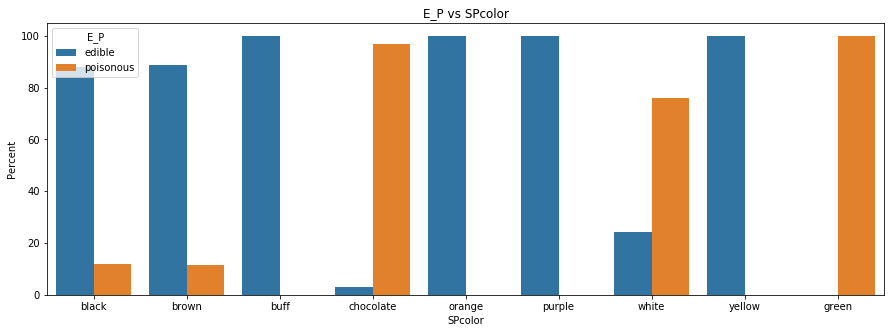

In [79]:
plt.figure(figsize=(15,5))
#plots newdf dataset by Odor and whether it is edible or not using the percentages
sns.barplot(x='SPcolor',y='Percent',hue='E_P',data=EP_SPcolor);
# give the plot a title
plt.title('E_P vs SPcolor');

In [80]:
# create a dataframe to calculate count of mushrooms by E_P and Habitat
EP_Habitat = newdf.groupby(['E_P','Habitat'],as_index=False)['SPcolor'].count()
EP_Habitat.rename(columns={'SPcolor':'Count'},inplace=True)
EP_Habitat

,E_P,Habitat,Count
0,edible,grasses,1408
1,edible,leaves,240
2,edible,meadows,256
3,edible,paths,136
4,edible,urban,96
5,edible,waste,192
6,edible,woods,1880
7,poisonous,grasses,740
8,poisonous,leaves,592
9,poisonous,meadows,36


In [81]:
# creates dataframe to merge total count of mushrooms by E_P or not and Odor by edible or not
EP_Habitat = pd.merge(EP_Habitat,Habitat,on=['Habitat'],how='outer',suffixes=('_EP_Habitat','_Total'))
EP_Habitat

,E_P,Habitat,Count_EP_Habitat,Count_Total
0,edible,grasses,1408,2148
1,poisonous,grasses,740,2148
2,edible,leaves,240,832
3,poisonous,leaves,592,832
4,edible,meadows,256,292
5,poisonous,meadows,36,292
6,edible,paths,136,1144
7,poisonous,paths,1008,1144
8,edible,urban,96,368
9,poisonous,urban,272,368


In [82]:
#creates column Percent to calculate percentage of mushrooms by E_P and by Odor
EP_Habitat['Percent'] = (EP_Habitat['Count_EP_Habitat']/EP_Habitat['Count_Total']) * 100
EP_Habitat

,E_P,Habitat,Count_EP_Habitat,Count_Total,Percent
0,edible,grasses,1408,2148,65.549348
1,poisonous,grasses,740,2148,34.450652
2,edible,leaves,240,832,28.846154
3,poisonous,leaves,592,832,71.153846
4,edible,meadows,256,292,87.671233
5,poisonous,meadows,36,292,12.328767
6,edible,paths,136,1144,11.888112
7,poisonous,paths,1008,1144,88.111888
8,edible,urban,96,368,26.086957
9,poisonous,urban,272,368,73.913043


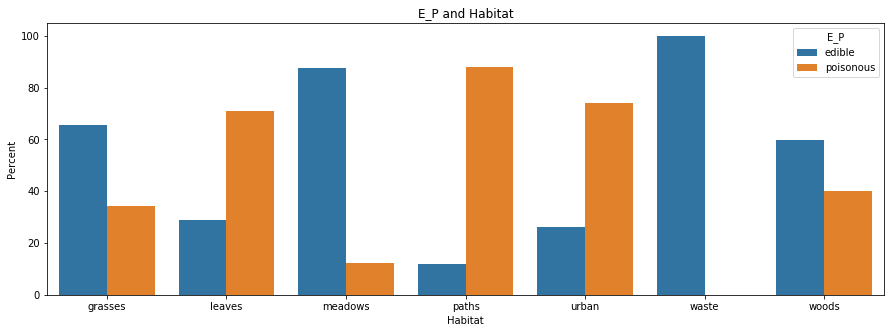

In [83]:
plt.figure(figsize=(15,5))
#plots mushroom dataset by Odor and whether it is edible or not using the percentages
sns.barplot(x='Habitat',y='Percent',hue='E_P',data=EP_Habitat);
# give the plot a title
plt.title('E_P and Habitat');